# InstaBot 
### using selenium

## This bot will scrape data off different food blogging profiles such as no. of followers, no. of posts in last 3 days, etc

# -Vidit Pushkarna

In [1]:
#importing important modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select

In [10]:
driver = webdriver.Chrome(executable_path = 'D:/chromedriver')
driver.maximize_window()
#started webdriver

In [11]:
driver.get("https://www.instagram.com/")

# Login

In [12]:
# #username
# WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//input[contains(@class, "_2hvTZ")]')))
# WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//button[contains(@class, "sqdOP-")]/div[contains(@class, "Igw0E")]')))
username='SAmple'
#password
password='Sample'
#input username
driver.find_element_by_xpath('//input[contains(@class, "_2hvTZ")]').send_keys(username)
#input password
driver.find_elements_by_xpath('//input[contains(@class, "_2hvTZ")]')[1].send_keys(password)


In [20]:
#click login
loginbutton = driver.find_elements_by_xpath("//button/div[contains(@class,'Igw0E')]")
# driver.find_element_by_xpath('//button[contains(@class, "_0mzm-")]/div[contains(@class, "Igw0E")]').click()
loginbutton[0].click()

In [28]:
#in the prompt click "not now"
# WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//button[contains(@class, "HoLwm")]')))
# notnow = driver.find_elements_by_link_text('Not Now')
notnow = driver.find_elements_by_xpath('//div/button[contains(@class, "sqdOP")]')
notnow[1].click()

In [32]:
# turn on notifs alert
notnow = driver.find_elements_by_xpath('//div/button[contains(@class, "HoLwm")]')
notnow[0].click()

# 1.1 Scraping the instagram handles which will appear on typing "Food" in the search bar.

In [53]:
#searching for "food" again in the search bar and storing the top 10 usernames in a list
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//span[contains(@class, "TqC_a")]')))
time.sleep(2)
driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys('food')
# WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//span[@class="Ap253"]')))
time.sleep(3)

In [54]:
count=0
users=[]
# list of top 10 users will be stored in this list.
for i in driver.find_elements_by_xpath('//div[@class="_7UhW9   xLCgt       qyrsm KV-D4          uL8Hv         "]'):
    user_n=i.get_attribute('innerHTML')
    if user_n[0]!='#' and count<10:
        users.append(i.get_attribute('innerHTML'))
        count+=1
driver.find_element_by_xpath("//div[contains(@class, 'coreSpriteSearchClear')]").click()

#now i will iterate through all the usernames in this list and do whatever is asked in the question
followers=[]
#this list will contain the number of followers of 10 users.


for user in users:
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//div[@class='_7UhW9   xLCgt       qyrsm KV-D4          uL8Hv         ']")))
    driver.find_element_by_xpath('//div[@class="_7UhW9   xLCgt       qyrsm KV-D4          uL8Hv         "]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[@class="-nal3 "]/span[@class="g47SY "]')))
    followers.append(driver.find_element_by_xpath('//a[@class="-nal3 "]/span[@class="g47SY "]').get_attribute('innerHTML'))
    time.sleep(3.2)
#now finally we have 2 arrays with usernames of users and their followers as a string. we need to convert this string into...
#an integer somehow.

In [56]:
users

['foodie_therapy2105',
 'foodie_incarnate',
 'yourfoodlab',
 'tasty.foodrecipes',
 'foodiebaye',
 'delhifoodwalks',
 'food',
 'foodrush.recipe',
 'food.nwonders',
 'food_lunatic']

In [58]:
followers

[75, 75, 491000.0, '1.7m', '2,429', '52', '75', '75', '583k', '33']

In [66]:
for i in range(len(followers)):
    if(type(followers[i])==str):
        if(followers[i][-1]=='m'):
            followers[i] = float(followers[i][:-1]) * 1000000
        elif(followers[i][-1]=='k'):
            followers[i] = float(followers[i][:-1]) * 1000
        elif(',' in followers[i]):
            followers[i]=int("".join(followers[i].split(',')))
#         else:
#             followers[i]=float(followers[i][:-1])*1000
followers=np.array(followers, dtype='int')
users=np.array(users)
#sorted in ascending order
users=users[np.argsort(followers)][::-1]
followers=followers[np.argsort(followers)][::-1]
#now printing top 5 
top5=[]
for x in range(5):
    print(users[x])
    top5.append(users[x])
#following is a list of users with highest number of followers among those top 10.

tasty.foodrecipes
food.nwonders
yourfoodlab
foodiebaye
foodrush.recipe


# 1.2. Finding the number of posts these handles have done in the previous 3 days.

In [174]:
#iterating through the list of top 5 users with maximum followers
# #and counting the number of posts they have done in past 3 days
# WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//span[contains(@class, "glyphsSpriteApp_instagram__outline__24__grey_9")]')))
# driver.find_element_by_xpath('//span[contains(@class, "glyphsSpriteApp_instagram__outline__24__grey_9")]').click()
no_of_posts=[]
for user in top5:
    time.sleep(3)
    print(user, end=' ')
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_7UhW9   xLCgt       qyrsm KV-D4          uL8Hv         "]')))
    driver.find_element_by_xpath('//div[@class="_7UhW9   xLCgt       qyrsm KV-D4          uL8Hv         "]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="v1Nh3 kIKUG  _bz0w"]')))
    time.sleep(1)
    count=0
    poststs = driver.find_elements_by_xpath('//div[@class="v1Nh3 kIKUG  _bz0w"]')
    for i in range(len(driver.find_elements_by_xpath('//div[@class="v1Nh3 kIKUG  _bz0w"]'))):
        poststs[i].click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//time[contains(@class, "Nzb55")]')))
        time_string=driver.find_element_by_xpath('//time[contains(@class, "Nzb55")]').get_attribute('innerHTML')
        if time_string[-1] in ['h', 's']:
            count+=1
        elif time_string[-1]=='d' and int(time_string[:-1])<=3:
            count+=1
        else:
            close = driver.find_element_by_xpath('//div[@class= "                     Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]/button')
            close.click()
#             driver.back()
            break
        close = driver.find_element_by_xpath('//div[@class= "                     Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]/button')
        close.click()
#         driver.back()
        time.sleep(3)
        
    print("have done", count, "posts in past 3 days")
    no_of_posts.append(count)

tasty.foodrecipes have done 3 posts in past 3 days
food.nwonders have done 3 posts in past 3 days
yourfoodlab have done 3 posts in past 3 days
foodiebaye have done 3 posts in past 3 days
foodrush.recipe have done 3 posts in past 3 days


# 1.3. Plotting Graph

<ipython-input-176-e487687b2d31>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(users, followers, color='rbycg')


<Figure size 432x288 with 0 Axes>

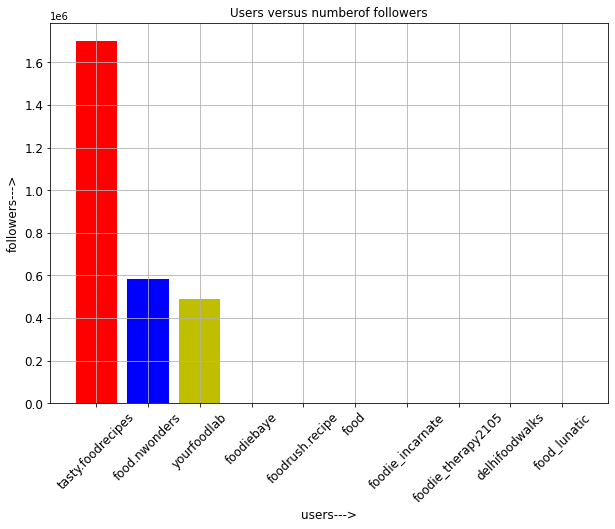

<ipython-input-176-e487687b2d31>:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(top5, no_of_posts, color='rbycg')


<Figure size 432x288 with 0 Axes>

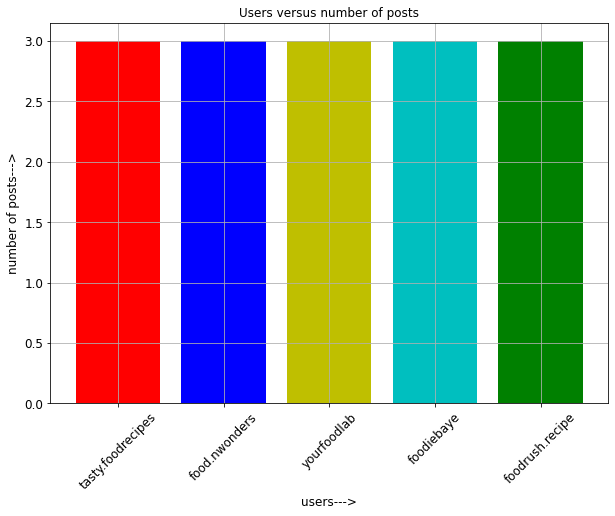

In [176]:
#plotting a graph between those 10 users and the number of followers
plt.subplots(0, 0)
plt.figure(figsize=(10, 7))
plt.bar(users, followers, color='rbycg')
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Users versus numberof followers', size=12)
plt.xlabel('users--->', size=12)
plt.ylabel('followers--->', size=12)
plt.grid()
plt.show()

#graph between top 5 users and the number of posts
plt.subplots(0, 1)
plt.figure(figsize=(10, 7))
plt.bar(top5, no_of_posts, color='rbycg')
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Users versus number of posts', size=12)
plt.xlabel('users--->', size=12)
plt.ylabel('number of posts--->', size=12)
plt.grid()
plt.show()

# 2.1. Opening the 5 handles I obtained in the last question, and scraping the content of the first 10 posts of each handle.

In [177]:
#the idea is to visit each page and go to each of the 10 posts and scrape the content and hashtags from there and store them in the
#separate lists
# WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//span[contains(@class, "glyphsSpriteApp_instagram__outline__24__grey_9")]')))
# driver.find_element_by_xpath('//span[contains(@class, "glyphsSpriteApp_instagram__outline__24__grey_9")]').click()
content=[]
hashtags=[]
for user in top5:
    time.sleep(3)
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_7UhW9   xLCgt       qyrsm KV-D4          uL8Hv         "]')))
    driver.find_element_by_xpath('//div[@class="_7UhW9   xLCgt       qyrsm KV-D4          uL8Hv         "]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
    time.sleep(1)
    count=0
    for i in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        i.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "C4VMK")]')))
        content.append(driver.find_element_by_xpath('//div[contains(@class, "C4VMK")]/span').get_attribute('textContent'))
        for hashes in driver.find_elements_by_xpath('//div[contains(@class, "C4VMK")]/span/a'):
            hashtags.append(hashes.get_attribute('innerHTML'))
        count+=1
        if count>=10:
            close = driver.find_element_by_xpath('//div[@class= "                     Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]/button')
            close.click()
#             driver.back()
            break
        close = driver.find_element_by_xpath('//div[@class= "                     Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]/button')
        close.click()
#         driver.back()
        time.sleep(1)
#finally i have two lists one named hashtags which contains all the hashtags, but unfortunately it also contains some usernames too.
#wee nee to filter them. and we also have a list named "content" which contains all the content of the perticular post

In [178]:
#this is the scrapped content of all posts
for i in content:
    print(i)
    print("-------------------------------------------------------------------------------------------------------------")

Tag/Share a chowmein lover💝#reels #instadaily #reelsinsta #reelsofinstagram #travel #reel #viralreels #photography #love #instagramreels #reelsviral #instagram #influencer #explore #trendinginstagood #trend #reelsvideo #video #viral #instareels #instagramvideo #instavideo #reelsinstagram #tiktok #memes #followforfollowback
-------------------------------------------------------------------------------------------------------------
Every Girl's love. TAG/SHARE a foodie ❤#reels #instadaily #reelsinsta #reelsofinstagram #travel #reel #viralreels #photography #love #instagramreels #reelsviral #instagram #influencer #explore #trendinginstagood #trend #reelsvideo #video #viral #instareels #instagramvideo #memes deo #reelsinstagram #tiktok #reelkarofeelkaro
-------------------------------------------------------------------------------------------------------------
Tag/Share a momos lover💝#reels #instadaily #reelsinsta #reelsofinstagram #travel #reel #viralreels #photography #love #instagramr

# Q2.2. Preparing a list of all words used in all the scraped posts and calculating the frequency of each word.

In [179]:
#here in the question i am considering that "words" mean hashtags. because there will be no sense of getting the frequency of all the words in the content.
#firstly i will convert the "hashtags" list to a numpy array
hashtags=np.array(hashtags)
hash_tags=[]#it will contain all the actual hashtags, where all the usernames are filtered from the hashtags array
for i in hashtags:
    if not i[0]=='@' and i!='':
        hash_tags.append(i)
#now "hash_tags" is the actual array which we actually require so we will keep it

In [180]:
dic=dict()#this will store the frequencies of all the hashtags
for i in hash_tags:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
dic
#this is our dictionary which contains all the frequencies of the hashtags

{'#reels': 40,
 '#instadaily': 40,
 '#reelsinsta': 40,
 '#reelsofinstagram': 40,
 '#travel': 40,
 '#reel': 40,
 '#viralreels': 40,
 '#photography': 40,
 '#love': 40,
 '#instagramreels': 40,
 '#reelsviral': 40,
 '#instagram': 50,
 '#influencer': 45,
 '#explore': 40,
 '#trendinginstagood': 40,
 '#trend': 45,
 '#reelsvideo': 40,
 '#video': 45,
 '#viral': 40,
 '#instareels': 40,
 '#instagramvideo': 40,
 '#instavideo': 35,
 '#reelsinstagram': 45,
 '#tiktok': 40,
 '#memes': 40,
 '#followforfollowback': 30,
 '#reelkarofeelkaro': 5,
 '#momos': 5,
 '#tastyfoodrecipies': 5,
 '#FOODIESOFINSTAGRAM': 5,
 '#cookwithme': 5,
 '#foodbloggers': 5,
 '#foodphotographer': 5,
 '#foodphotography': 5,
 '#followｍe': 5,
 '#hashtags': 5,
 '#hashtag': 10,
 '#foodstagram': 5,
 '#youtube': 10,
 '#foodstylist': 5,
 '#eatingfortheinsta': 5,
 '#easytomake': 5,
 '#foodlover': 5,
 '#foodie': 5,
 '#likeit': 5,
 '#delhiblogger': 5,
 '#bloggersofinstagram': 5,
 '#insta': 5,
 '#igtv': 5,
 '#igtvfollow': 5,
 '#instagood': 5,

# Q2.3. Creating a csv file with two columns : the word and its frequency

In [181]:

hash_word=np.array([i[1:] for i in dic.keys()])
frequency=np.array([i for i in dic.values()])
df=pd.DataFrame()
df['Words']=hash_word
df['Frequency']=frequency
df.to_csv('Hashtag_Frequencies.csv')
#hence the file is saved in the working directory

# 2.4. Finding the hashtags that were most popular among these bloggers

In [182]:
#we have the two arrays named hash_word and frequency.
#we will first arrange them in descending order and then print the hashtags that were most popular among them.

In [184]:
hash_word=hash_word[np.argsort(frequency)][::-1]
frequency=frequency[np.argsort(frequency)][::-1]
for i in range(len(hash_word)):
    print('#'+hash_word[i], "----->", frequency[i], "times")

#instagram -----> 50 times
#video -----> 45 times
#influencer -----> 45 times
#reelsinstagram -----> 45 times
#trend -----> 45 times
#reelsviral -----> 40 times
#love -----> 40 times
#photography -----> 40 times
#viralreels -----> 40 times
#instadaily -----> 40 times
#travel -----> 40 times
#reelsofinstagram -----> 40 times
#instagramreels -----> 40 times
#reel -----> 40 times
#reelsinsta -----> 40 times
#reels -----> 40 times
#memes -----> 40 times
#trendinginstagood -----> 40 times
#explore -----> 40 times
#reelsvideo -----> 40 times
#viral -----> 40 times
#instareels -----> 40 times
#instagramvideo -----> 40 times
#tiktok -----> 40 times
#instavideo -----> 35 times
#followforfollowback -----> 30 times
#youtube -----> 10 times
#hashtag -----> 10 times
#foodstylist -----> 5 times
#followｍe -----> 5 times
#reelkarofeelkaro -----> 5 times
#momos -----> 5 times
#tastyfoodrecipies -----> 5 times
#FOODIESOFINSTAGRAM -----> 5 times
#cookwithme -----> 5 times
#foodbloggers -----> 5 times
#ha

# Q2.5. Plotting a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

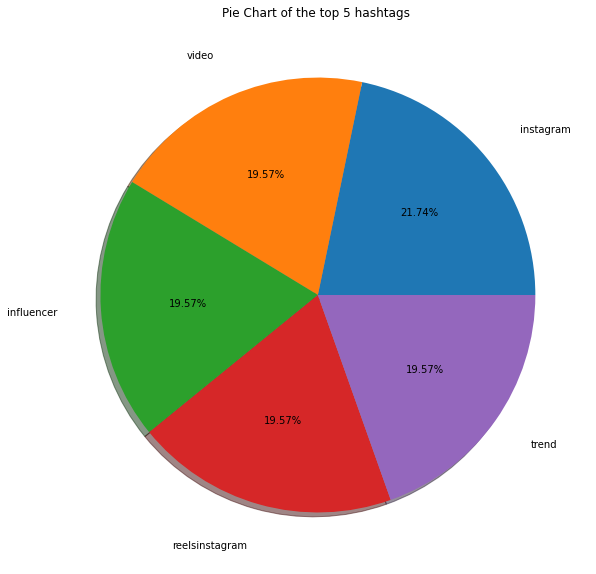

In [185]:
x=hash_word[:5]
y=frequency[:5]
plt.figure(figsize=(10, 10))
plt.pie(y, labels=x, autopct='%.2f%%', shadow=True, labeldistance=1.2)
plt.title('Pie Chart of the top 5 hashtags ')
plt.show()

# Note:- Since now, instagram has given feature to hide the likes, this code was working when I performed this project.. i'm sharing earlier screenshots of graphs of likes in the repository


# -----------------------------------------------------------------------------------------------------------

# 3.1. Finding out the likes of the top 10 posts of the 5 handles obtained earlier.

In [187]:
like=[]
for user in top5:
    print(user, end="----> ")
    time.sleep(3)
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_7UhW9   xLCgt       qyrsm KV-D4          uL8Hv         "]')))
    driver.find_element_by_xpath('//div[@class="_7UhW9   xLCgt       qyrsm KV-D4          uL8Hv         "]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
    time.sleep(1)
    count=0
    likes=0
    for i in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        i.click()
        #clicks on the post of the user being iterated.
        try:
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="Nm9Fw"]/button[contains(@class, "_0mzm-")]/span')))
            likes+=int("".join(driver.find_element_by_xpath('//div[@class="Nm9Fw"]/button[contains(@class, "_0mzm-")]/span').get_attribute('innerHTML').split(',')))
        except TimeoutException:
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "HbPOm")]/span[contains(@class, "vcOH2")]/span')))
            likes+=int("".join(driver.find_element_by_xpath('//div[contains(@class, "HbPOm")]/span[contains(@class, "vcOH2")]/span').get_attribute('innerHTML').split(',')))
        count+=1
        if count>=10:
            close = driver.find_element_by_xpath('//div[@class= "                     Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]/button')
            close.click()
            break
        close = driver.find_element_by_xpath('//div[@class= "                     Igw0E     IwRSH      eGOV_         _4EzTm                                                                                  BI4qX            qJPeX            fm1AK   TxciK yiMZG"]/button')
        close.click()
        time.sleep(1)
    print("total", likes, "likes on 10 latest posts")
    like.append(likes)

tasty.foodrecipes----> 

TimeoutException: Message: 


In [ ]:
top5=np.array(top5)
top5

In [ ]:
like=np.array(like)
#likes on the top 10 posts for those 5 users
like

In [ ]:
followers[0:5]
#followers of those 5 users

# 3.2. Calculating the average likes for a handle.

In [ ]:
average_likes=like/10
average_likes
#these are the average likes of the respective 5 users.

# 3.3. Dividing the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle

In [ ]:
#for getting average followers to likes ratio
ratio=followers[0:5]/average_likes
ratio

# 3.4. Creating a bar graph to depict the above obtained information.

In [ ]:
#plotting the graph between average followers to the likes ratio and users.
plt.figure(figsize=(10,7))
plt.bar(top5, ratio, color='orange')
plt.xticks(rotation=45, size=12)
plt.xlabel('Users---->', size=12)
plt.ylabel('Average followers to likes ratio---->', size=12)
plt.yticks(size=12)
plt.grid()
plt.show()